В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [45]:
import pandas as pd
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']


Завдання 1.1 Відповідь

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def mnk_with_numpy(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # Розраховуємо параметри
    return theta

X = np.array(non_smoker_df.age)
X = X.reshape(-1, 1)
y = np.array(non_smoker_df.charges)
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X] # Додаємо одиничний вектор до вектора х-ів

print(X[:3], X.shape, '\n',  X_with_intercept[:3], '\n', X_with_intercept.shape)
mnk_with_numpy_coef = mnk_with_numpy(X_with_intercept, y) # Розраховуємо коефіцієнти
print('Коєфіціенти методом МНК', mnk_with_numpy_coef)

[[18]
 [28]
 [33]] (1064, 1) 
 [[ 1. 18.]
 [ 1. 28.]
 [ 1. 33.]] 
 (1064, 2)
Коєфіціенти методом МНК [-2091.42055657   267.24891283]


In [55]:
predictions_mnk = np.dot(X_with_intercept, mnk_with_numpy_coef) # Знаходимо функцію з коеф-ми, розрахованими методом МНК
predictions_mnk[:3], y[:3] # Виводимо для порівняння

(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 array([ 1725.5523 ,  4449.462  , 21984.47061]))

In [83]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
RMSE_mnk1 = root_mean_squared_error(y, predictions_mnk)
print(f"Root Mean Squared Error: {RMSE_mnk1:.2f}")

Root Mean Squared Error: 4662.51


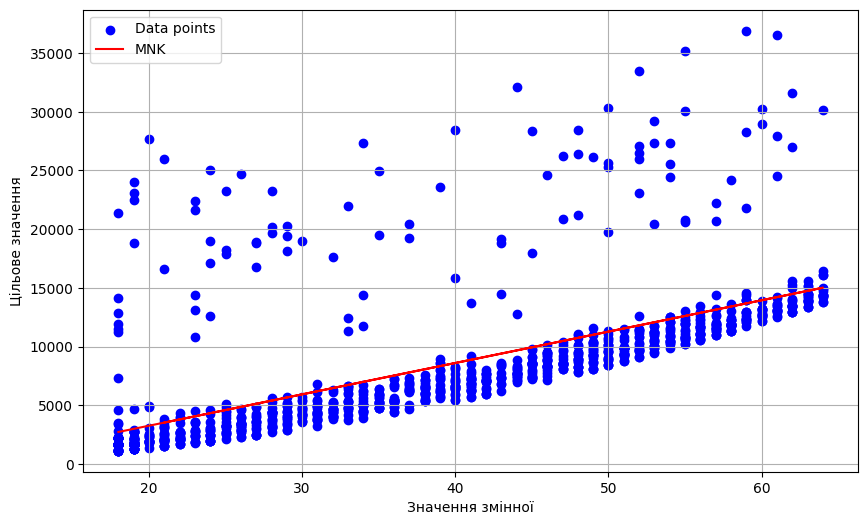

In [8]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_mnk, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

Завдання 1.2 Відповідь

In [36]:
X, y

(array([[18],
        [28],
        [33],
        ...,
        [18],
        [18],
        [21]], shape=(1064, 1)),
 array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
         1629.8335 ,  2007.945  ], shape=(1064,)))

In [142]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for i in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

# Learnin rate = 0.0001
m, b, errors = full_batch_gradient_descent(X, y, lr=0.0001, epochs=1000)
print(f'Коефіцієнти методом FBGD (lr=0.0001): {b:.2f}, {m:.2f}')

predictions_fbgd1 = m * X[:, 0] + b

RMSE_mnk2 = root_mean_squared_error(y, predictions_fbgd1)
print(f"Root Mean Squared Error: {RMSE_mnk2:.2f}")


# Learnin rate = 0.0005
m, b, errors = full_batch_gradient_descent(X, y, lr=0.0005, epochs=1000)
print(f'Коефіцієнти методом FBGD (lr=0.0005): {b:.2f}, {m:.2f}')

predictions_fbgd2 = m * X[:, 0] + b

RMSE_mnk2 = root_mean_squared_error(y, predictions_fbgd2)
print(f"Root Mean Squared Error: {RMSE_mnk2:.2f}")

# Learnin rate = 0.00001
m, b, errors = full_batch_gradient_descent(X, y, lr=0.00001, epochs=1000)
print(f'Коефіцієнти методом FBGD (lr=0.00001): {b:.2f}, {m:.2f}')

predictions_fbgd3 = m * X[:, 0] + b

RMSE_mnk2 = root_mean_squared_error(y, predictions_fbgd3)
print(f"Root Mean Squared Error: {RMSE_mnk2:.2f}")


Коефіцієнти методом FBGD (lr=0.0001): -41.98, 221.10
Root Mean Squared Error: 4713.25
Коефіцієнти методом FBGD (lr=0.0005): -219.46, 225.10
Root Mean Squared Error: 4704.88
Коефіцієнти методом FBGD (lr=0.00001): 0.21, 220.15
Root Mean Squared Error: 4715.35


Початковий крок 0,1 надмірно великий - зведення в квадрат дає крайні результати, що переповнює регістри і розрахунки не виконуються. Далі крок навчання від 1/10000 до 1/100000. Найкраще показав себе крок 5/10000, який дає результат відхилення RMSE найменший

Завдання 1.3 Відповідь

In [112]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X, y)
print(f'Коефіцієнти з scikit-learn: {lin_reg.intercept_:.2f}, {lin_reg.coef_[0]:.2f}')

predictions_skl = lin_reg.intercept_ + lin_reg.coef_[0]*X

RMSE_skl = root_mean_squared_error(y, predictions_skl)
print(f"Root Mean Squared Error: {RMSE_skl:.2f}")

Коефіцієнти з scikit-learn: -2091.42, 267.25
Root Mean Squared Error: 4662.51


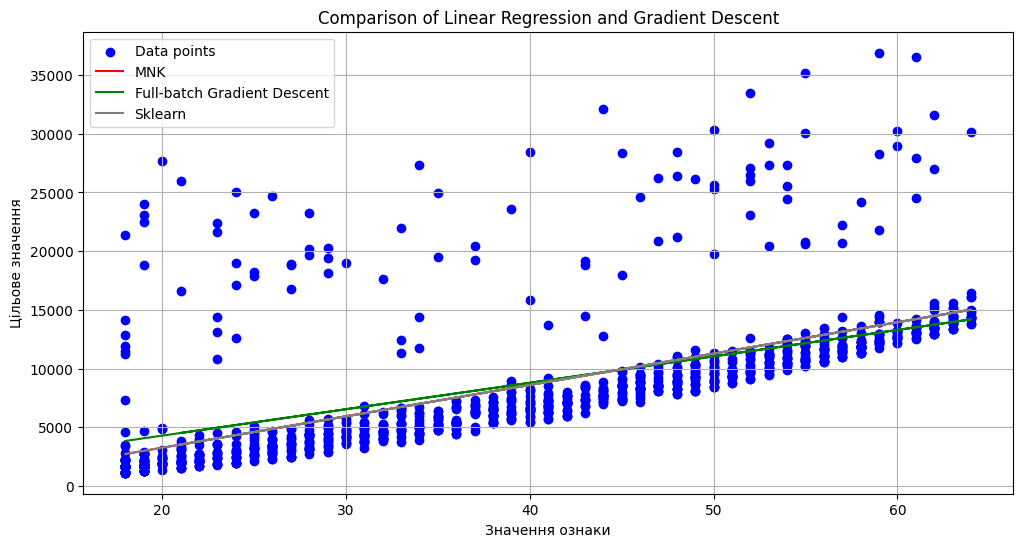

In [121]:
# Візуалізація результатів усіх трьох способів
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_mnk, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd2, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_skl, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

Очевидно, що графіки методів МНК і з використанням scikit-learn збіглися. Графік FBGD відрізняється, але візуально не побачити, що він гірше визначив параметри моделі.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

Завдання 2. Відповідь

In [148]:
smoker_df = medical_df[medical_df.smoker == 'yes']
X = np.array(smoker_df.age)
X = X.reshape(-1, 1)
y = np.array(smoker_df.charges)

In [150]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X, y)
print(f'Коефіцієнти з scikit-learn: {lin_reg.intercept_:.2f}, {lin_reg.coef_[0]:.2f}')

predictions_skl = lin_reg.intercept_ + lin_reg.coef_[0]*X

RMSE_skl = root_mean_squared_error(y, predictions_skl)
print(f"Root Mean Squared Error: {RMSE_skl:.2f}")

Коефіцієнти з scikit-learn: 20294.13, 305.24
Root Mean Squared Error: 10711.00


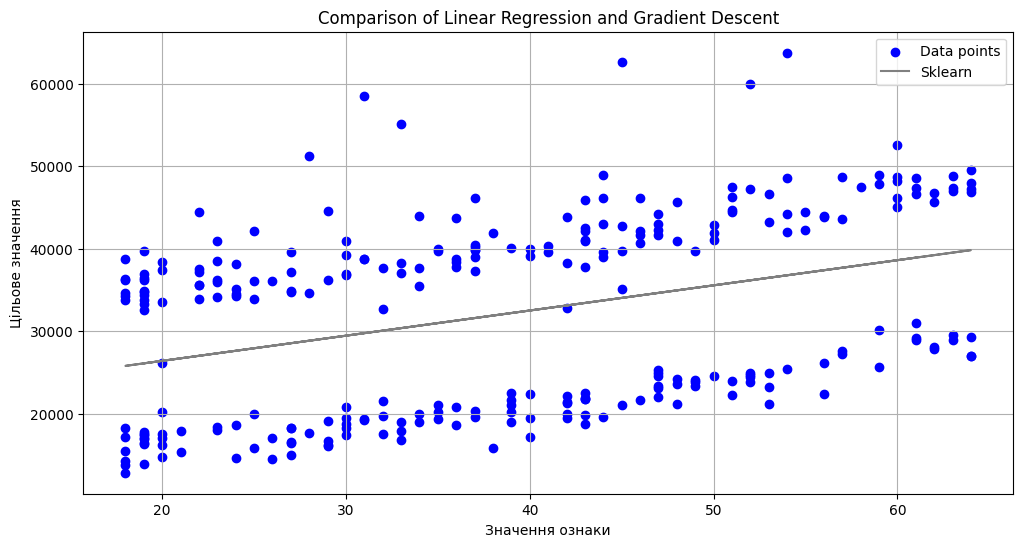

In [151]:
# Візуалізація результатів моделі для курців
# Судячи по великій сумі RMSE така модель зовсім погана
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_skl, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

Дані візуально поділяються на дві великі групи. Однак наша модель, побудована однією ознакою зовсім не враховує цього - її графік розташований посередині між групами. Це як середня температура у лікарні. Модель, мабуть, дуже погана, не варто її використовувати.